<a href="https://colab.research.google.com/github/tamarasessink/Master_Thesis/blob/master/Thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# clone my git repository
!git clone https://github.com/tamarasessink/Master_Thesis.git

Cloning into 'Master_Thesis'...
remote: Enumerating objects: 396, done.
remote: Counting objects: 100% (191/191), done.
remote: Compressing objects: 100% (146/146), done.
remote: Total 396 (delta 115), reused 101 (delta 42), pack-reused 205
Receiving objects: 100% (396/396), 1.52 MiB | 3.54 MiB/s, done.
Resolving deltas: 100% (224/224), done.


In [3]:
# install necassary packages
!pip install pytorch-lightning==0.7.6
# !pip install torch-lr-finder

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.0/249.0 kB 20.6 MB/s eta 0:00:00


In [ ]:
!pip uninstall opencv-torchvision-transforms-yuzhiyang

In [ ]:
# pre-train the SmaAth_UNet with the precipitation maps
!python /content/Master_Thesis/main_moco.py \
  --lr 0.015 \
  --batch-size 64 \
  --dist-url 'tcp://localhost:10001' --multiprocessing-distributed --world-size 1 --rank 0 \

2023-05-01 11:06:51.482355: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-01 11:06:52.580537: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-01 11:06:57.299601: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Use GPU: 0 for training
=> creating model 'SmaAt_UNet_pre(
  (inc): DoubleConvDS(
    (double_conv): Sequential(
      (0): DepthwiseSeparableConv(
        (depthwise): Conv2d(12, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=12)
        (pointwise): Conv2d(24, 64, kernel_size=(1, 1), stride=(1, 1))
      )
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(

In [ ]:
# pre-training with ResNet-50
!python /content/Master_Thesis/main_moco.py \
  --lr 0.03 \
  --batch-size 256 \
  --dist-url 'tcp://localhost:10001' --multiprocessing-distributed --world-size 1 --rank 0 \


Streaminguitvoer ingekort tot de laatste 5000 regels.
2023-03-25 02:24:40.346022: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-03-25 02:24:40.346126: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-03-25 02:24:40.346146: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
2023-03-25 02:24:44.247293: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could no

In [ ]:
# pre-training with SmaAth_UNet with loss lr 0.015
!python /content/Master_Thesis/main_moco.py \
  --lr 0.015 \
  --batch-size 32 \
  --dist-url 'tcp://localhost:10001' --multiprocessing-distributed --world-size 1 --rank 0 \

2023-05-02 06:54:17.025416: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-02 06:54:18.171011: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-02 06:54:22.983277: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Use GPU: 0 for training
=> creating model 'SmaAt_UNet_pre(
  (inc): DoubleConvDS(
    (double_conv): Sequential(
      (0): DepthwiseSeparableConv(
        (depthwise): Conv2d(12, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=12)
        (pointwise): Conv2d(24, 64, kernel_size=(1, 1), stride=(1, 1))
      )
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=

In [ ]:
# pre-training with SmaAth_UNet with loss lr 0.0075
!python /content/Master_Thesis/main_moco.py \
  --lr 0.0075 \
  --batch-size 32 \
  --dist-url 'tcp://localhost:10001' --multiprocessing-distributed --world-size 1 --rank 0 \

2023-05-02 16:14:46.408167: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-02 16:14:47.425120: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-02 16:14:52.270613: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Use GPU: 0 for training
=> creating model 'SmaAt_UNet_pre(
  (inc): DoubleConvDS(
    (double_conv): Sequential(
      (0): DepthwiseSeparableConv(
        (depthwise): Conv2d(12, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=12)
        (pointwise): Conv2d(24, 64, kernel_size=(1, 1), stride=(1, 1))
      )
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=

In [ ]:
# pre-training with SmaAth_UNet with loss lr 0.0075 and arrays as images not PIL images
!python /content/Master_Thesis/main_moco.py \
  --lr 0.001 \
  --batch-size 32 \
  --dist-url 'tcp://localhost:10001' --multiprocessing-distributed --world-size 1 --rank 0 \

2023-05-04 21:01:39.436736: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-04 21:01:40.373227: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-04 21:01:44.733411: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Use GPU: 0 for training
=> creating model 'SmaAt_UNet_pre(
  (inc): DoubleConvDS(
    (double_conv): Sequential(
      (0): DepthwiseSeparableConv(
        (depthwise): Conv2d(12, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=12)
        (pointwise): Conv2d(24, 64, kernel_size=(1, 1), stride=(1, 1))
      )
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=

In [ ]:
# pre-training with SmaAth_UNet with loss lr 0.0075 and arrays as images not PIL images
!python /content/Master_Thesis/main_moco.py \
  --lr 0.00375 \
  --batch-size 32 \
  --dist-url 'tcp://localhost:10001' --multiprocessing-distributed --world-size 1 --rank 0 \

2023-05-05 08:46:21.916144: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-05 08:46:22.932785: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-05 08:46:27.478217: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Use GPU: 0 for training
=> creating model 'SmaAt_UNet_pre(
  (inc): DoubleConvDS(
    (double_conv): Sequential(
      (0): DepthwiseSeparableConv(
        (depthwise): Conv2d(12, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=12)
        (pointwise): Conv2d(24, 64, kernel_size=(1, 1), stride=(1, 1))
      )
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=

In [ ]:
# [0.1, 0.03, 0.01, 0.003, 0.001]
# already tried 0.001 (coverges at loss 3.1)
# pre-training with SmaAth_UNet with loss lr 0.0075 and arrays as images not PIL images
!python /content/Master_Thesis/main_moco.py \
  --lr 0.03 \
  --batch-size 32 \
  --dist-url 'tcp://localhost:10001' --multiprocessing-distributed --world-size 1 --rank 0 \

2023-05-06 11:10:06.874703: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-06 11:10:07.971635: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-06 11:10:13.266510: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Use GPU: 0 for training
=> creating model 'SmaAt_UNet_pre(
  (inc): DoubleConvDS(
    (double_conv): Sequential(
      (0): DepthwiseSeparableConv(
        (depthwise): Conv2d(12, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=12)
        (pointwise): Conv2d(24, 64, kernel_size=(1, 1), stride=(1, 1))
      )
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=

In [8]:
# training with SmaAth_UNet using pre-trained weights
!python /content/Master_Thesis/train_precip_lightning.py --model 'SmaAt_UNet' --n_channels 12 --n_classes 1

2023-05-08 13:36:44.235002: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-08 13:36:44.291048: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-08 13:36:45.286152: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 24, 288, 288]             240
            Conv2d-2         [-1, 64, 288, 288]          

In [7]:
# training with SmaAth_UNet using pre-trained weights
!python /content/Master_Thesis/train_precip_lightning.py --model 'SmaAt_UNet' --n_channels 12 --n_classes 1

2023-05-08 08:30:42.509532: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-08 08:30:42.570525: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-08 08:30:43.499344: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 24, 288, 288]             240
            Conv2d-2         [-1, 64, 288, 288]          

In [28]:
# training with SmaAth_UNet using pre-trained weights
!python /content/Master_Thesis/cal_metrics_test_set.py

2023-05-08 14:46:24.259726: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-08 14:46:24.314174: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-08 14:46:25.237238: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
  0% 0/1557 [00:00<?, ?it/s]/content/Master_Thesis/cal_metrics_test_set.py:30: UserWarning: Using a target size (torch.Size([1, 288, 288])) that is different to the input size (torch.Size([288, 288])). This will likely lead to incorrect results due t

In [22]:
# testing with SmaAth_UNet
!python /content/Master_Thesis/test_precip_lightning.py

2023-05-08 14:30:03.747298: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-08 14:30:03.802083: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-08 14:30:04.768670: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
  0% 0/1557 [00:00<?, ?it/s]/content/Master_Thesis/test_precip_lightning.py:123: UserWarning: Using a target size (torch.Size([1, 288, 288])) that is different to the input size (torch.Size([288, 288])). This will likely lead to incorrect results due

(5734, 18, 288, 288)
[[0.00020907 0.00020907 0.00020907 ... 0.         0.         0.        ]
 [0.00020907 0.00020907 0.00020907 ... 0.         0.         0.        ]
 [0.00020907 0.00020907 0.00020907 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.00020907 0.00020907 0.00020907]
 [0.         0.         0.         ... 0.00020907 0.00020907 0.00020907]
 [0.         0.         0.         ... 0.00020907 0.00020907 0.00020907]]
[[5.1 5.1 5.1 ... 0.  0.  0. ]
 [5.1 5.1 5.1 ... 0.  0.  0. ]
 [5.1 5.1 5.1 ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 5.1 5.1 5.1]
 [0.  0.  0.  ... 5.1 5.1 5.1]
 [0.  0.  0.  ... 5.1 5.1 5.1]]
<PIL.Image.Image image mode=L size=288x288 at 0x7F9AD86A8D60>


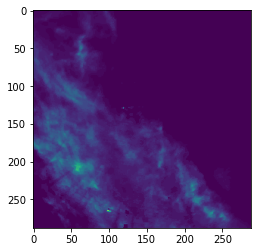

In [ ]:
# testing input

import pylab as plt
import numpy as np
import h5py
from PIL import Image

f = h5py.File('/content/drive/MyDrive/train_test_2016-2019_input-length_12_img-ahead_6_rain-threshhold_50.h5', "r")
traindir = f['/train/images']
print(traindir.shape)
test = np.reshape(traindir[4][17:], (288,288))
print(test)
# Assuming the tensor values are in the range [min_val, max_val]
min_val = np.min(test)
max_val = np.max(test)
test = (test - min_val) / (max_val - min_val) * 255.0
print(test)
# test = test*10000

image = Image.fromarray(np.uint8(test))
print(image)
image.save("test.jpeg")
# image.open("test.jpeg")
plt.imshow(image)

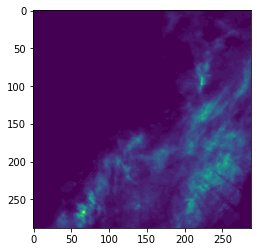

In [ ]:
# testing input and transformation
import torchvision.transforms as transforms
from PIL import Image
# after agmentation
image = Image.fromarray(np.uint8(test))

transform = transforms.RandomHorizontalFlip(p=0.8)
img = transform(image)
plt.imshow(img)

mean and std before normalize:
Mean of the image: tensor([0.0619])
Std of the image: tensor([0.0852])


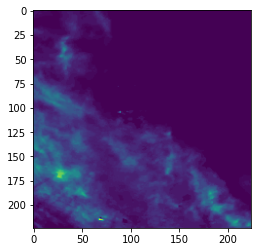

In [ ]:
# testing input and augmentation on image
import torch
import torchvision.transforms as transforms
# we only have 1 not 3 dimensions per image thus only 1 mean and std
transform = transforms.Compose([
    transforms.ToTensor()
])
# get tensor image
img_tr = transform(image)
# calculate mean and std
mean, std = img_tr.mean([1,2]), img_tr.std([1,2])
# print mean and std
print("mean and std before normalize:")
print("Mean of the image:", mean)
print("Std of the image:", std)


normalize = transforms.Normalize(mean=[0.0188],
                                     std=[0.0278])
augmentation = [transforms.RandomResizedCrop(224, scale=(0.2, 1.)),
            transforms.RandomGrayscale(p=0.2),
            transforms.ColorJitter(0.4, 0.4, 0.4, 0.4),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(), normalize]
aug = transforms.Compose(augmentation)
img = aug(image)
test2 =  torch.squeeze(img,0)
plt.imshow(test2)

